# Setup

Here, we already imported most of the packages that you might want to use

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import pm4py

## Log Util
# Log conversion
from pm4py.objects.conversion.log import converter as log_converter
# Read Log (e.g., If you can not use the simplified interface because you do not have ipywidgets installed)
from pm4py.objects.log.importer.xes import importer as xes_importer

## Conformance Checking
# Token-based replay (e.g., If you can not use the simplified interface because you do not have ipywidgets installed)
from pm4py.algo.evaluation.replay_fitness import evaluator as replay_fitness_evaluator
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
# Standard Alignments (e.g., If you can not use the simplified interface because you do not have ipywidgets installed)
from pm4py.algo.conformance.alignments import algorithm as alignments
# Decomposed Alignments (e.g., If you can not use the simplified interface because you do not have ipywidgets installed)
from pm4py.algo.conformance.alignments.decomposed import algorithm as decomp_alignments

## Petri Nets
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils

/home/hauke/anaconda3/lib/python3.7/site-packages/pm4py/algo/conformance/alignments/algorithm.py:19: UserWarning: please use pm4py.algo.conformance.alignments.petri_net.algorithm instead
  warnings.warn("please use pm4py.algo.conformance.alignments.petri_net.algorithm instead")


# Hints
**Have look at the simplified interface of PM4Py $\rightarrow$ Click on the 'See Simplified Interface' buttons on the documentation page**

Good way to convert a DataFrame so that it works nicely in PM4Py
```python
df = pm4py.format_dataframe(df, case_id=case_id_column activity_key=activity_column, timestamp_key=timestamp_column)
```

To create a DFG, you might want to use the following procedure
```python
dfg, start_activities, end_activities = pm4py.discover_directly_follows_graph(log)
pm4py.view_dfg(dfg, start_activities, end_activities)
```

If you do not have ipywidgets installed, you'll probably encounter the ```IProgress not found``` error.
In that case, it should help to deactivate the progress bar by passing a dictionary with the following key:
```python
{'show_progress_bar': False}
```
However, currently you can not use the simplified interface then. Instead you have to use the base functions.
For example, for importing a log without progress bar, you can use
```
log = xes_importer.apply('log.xes',parameters={'show_progress_bar':False})
```
If you have ipywidgets installed
```python
log = pm4py.read_xes(file_path)
```
can be used.

## Question 1c)

We import the CSV and a binary variable to indicate patients older than 80 years.

In [3]:
# Import the CSV as a pandas dataframe and have a first look
df = pd.read_csv('data/log_vaccination.csv', sep=',')
df

Timestamp  Patient                      Activity Lifecycle  \
0      2020-06-01 06:00:01        0             Enter into System  complete   
1      2020-06-01 06:00:01        1             Enter into System  complete   
2      2020-06-01 06:00:01        2             Enter into System  complete   
3      2020-06-01 06:00:01        3             Enter into System  complete   
4      2020-06-01 06:00:01        7             Enter into System  complete   
...                    ...      ...                           ...       ...   
87370  2021-04-10 14:19:17     4670                  Send Invoice  complete   
87371  2021-04-10 14:34:57     4261                  Send Invoice  complete   
87372  2021-04-10 14:35:18     4670  Send Vaccination Certificate  complete   
87373  2021-04-10 14:50:05     4261  Send Vaccination Certificate  complete   
87374  2021-04-10 16:04:37     4680  Send Vaccination Certificate  complete   

       Age Insurance  
0       99      STAT  
1       92      STAT  
2      100      PRIV  
3       91      STAT  
4       92      STAT  
...    ...       ...  
87370   24      PRIV  
87371   20      PRIV  
87372   24      PRIV  
87373   20      PRIV  
87374   35      STAT  

[87375 rows x 6 columns]

In [4]:
# Create the new binary variable using list comprehension
binary_age_80 = [1 if age >= 80 else 0 for age in df.Age.values]
np.unique(binary_age_80, return_counts=True)

(array([0, 1]), array([71669, 15706]))

For 15.706 events a 1 is added in the dataframe, because the age of the patient is greater or equal than 80. The remaining 71.669 events get added a 0.

In [5]:
# Add the new variable to the dataframe
df['Age_bin_80'] = binary_age_80
df

Timestamp  Patient                      Activity Lifecycle  \
0      2020-06-01 06:00:01        0             Enter into System  complete   
1      2020-06-01 06:00:01        1             Enter into System  complete   
2      2020-06-01 06:00:01        2             Enter into System  complete   
3      2020-06-01 06:00:01        3             Enter into System  complete   
4      2020-06-01 06:00:01        7             Enter into System  complete   
...                    ...      ...                           ...       ...   
87370  2021-04-10 14:19:17     4670                  Send Invoice  complete   
87371  2021-04-10 14:34:57     4261                  Send Invoice  complete   
87372  2021-04-10 14:35:18     4670  Send Vaccination Certificate  complete   
87373  2021-04-10 14:50:05     4261  Send Vaccination Certificate  complete   
87374  2021-04-10 16:04:37     4680  Send Vaccination Certificate  complete   

       Age Insurance  Age_bin_80  
0       99      STAT           1  
1       92      STAT           1  
2      100      PRIV           1  
3       91      STAT           1  
4       92      STAT           1  
...    ...       ...         ...  
87370   24      PRIV           0  
87371   20      PRIV           0  
87372   24      PRIV           0  
87373   20      PRIV           0  
87374   35      STAT           0  

[87375 rows x 7 columns]

In [6]:
# Export the dataframe again to than import it in PROM
df.to_csv('data/log_vaccination_bin_80.csv', index=False)

## Question 3

In [7]:
df = pd.read_csv('data/log_vaccination.csv', sep=',')
df

Timestamp  Patient                      Activity Lifecycle  \
0      2020-06-01 06:00:01        0             Enter into System  complete   
1      2020-06-01 06:00:01        1             Enter into System  complete   
2      2020-06-01 06:00:01        2             Enter into System  complete   
3      2020-06-01 06:00:01        3             Enter into System  complete   
4      2020-06-01 06:00:01        7             Enter into System  complete   
...                    ...      ...                           ...       ...   
87370  2021-04-10 14:19:17     4670                  Send Invoice  complete   
87371  2021-04-10 14:34:57     4261                  Send Invoice  complete   
87372  2021-04-10 14:35:18     4670  Send Vaccination Certificate  complete   
87373  2021-04-10 14:50:05     4261  Send Vaccination Certificate  complete   
87374  2021-04-10 16:04:37     4680  Send Vaccination Certificate  complete   

       Age Insurance  
0       99      STAT  
1       92      STAT  
2      100      PRIV  
3       91      STAT  
4       92      STAT  
...    ...       ...  
87370   24      PRIV  
87371   20      PRIV  
87372   24      PRIV  
87373   20      PRIV  
87374   35      STAT  

[87375 rows x 6 columns]

In [11]:
activities_for_projection = ["Enter into System", "Insurance Check Statutory", "Insurance Check Private", "Acknowledge vacc. possibility",
"Request appointment", "Appointment granted", "Vaccinate", "Send Vaccination Certificate", "Send Invoice"]

In [12]:
filtered_df = df[~df.Activity.isin(activities_for_projection)]
filtered_df

Timestamp  Patient                              Activity  \
35     2020-06-01 06:00:01       47  Special Priority Appointment granted   
477    2020-06-01 09:10:01       53        Notify about vacc. possibility   
478    2020-06-01 09:10:02      135        Notify about vacc. possibility   
479    2020-06-01 09:10:02       97        Notify about vacc. possibility   
480    2020-06-01 09:10:08      211        Notify about vacc. possibility   
...                    ...      ...                                   ...   
87189  2021-03-27 14:00:00     4680                       Prepare vaccine   
87190  2021-03-27 14:05:55     4680                Send vaccine to cabine   
87195  2021-03-27 14:40:00     4680      Register at vaccination facility   
87196  2021-03-27 14:43:42     4680                    Submit Declaration   
87201  2021-03-27 15:04:07     4680                              Checkout   

      Lifecycle  Age Insurance  
35     complete   98      STAT  
477    complete   93      STAT  
478    complete   99      PRIV  
479    complete   95      STAT  
480    complete   99      STAT  
...         ...  ...       ...  
87189  complete   35      STAT  
87190  complete   35      STAT  
87195  complete   35      STAT  
87196  complete   35      STAT  
87201  complete   35      STAT  

[49261 rows x 6 columns]

In [25]:
print(f"Number of patients in original df: {len(set(df.Patient.values))}, number of patients in filtered df: {len(set(filtered_df.Patient.values))}")

Number of patients in original df: 4750, number of patients in filtered df: 4750


In [26]:
event_log = pm4py.format_dataframe(filtered_df, case_id='Patient', activity_key='Activity',timestamp_key='Timestamp')

In [27]:
im_all = pm4py.discover_process_tree_inductive(event_log, noise_threshold=0.0)

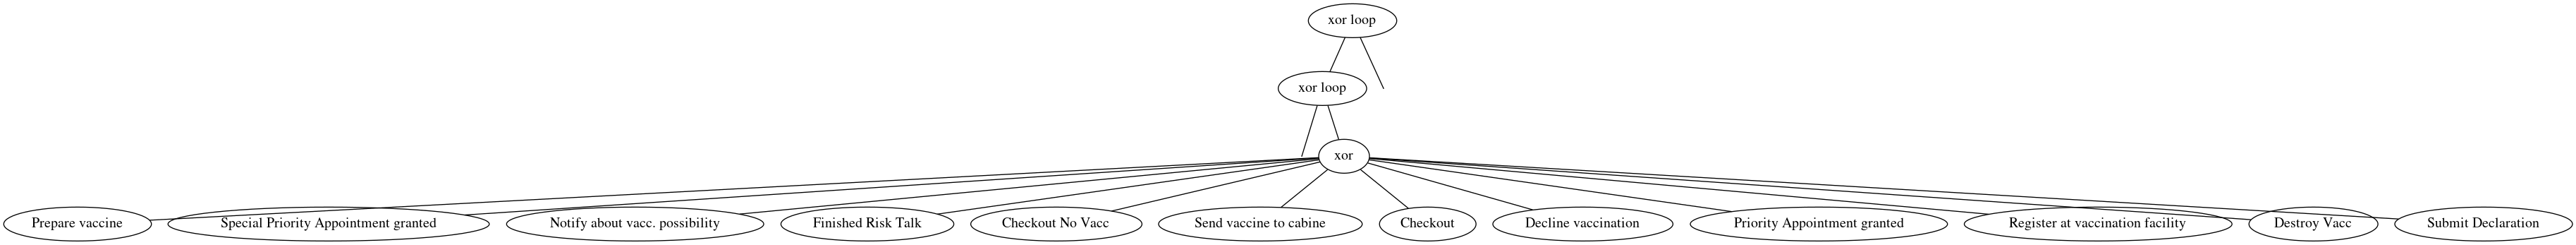

In [28]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz = pt_visualizer.apply(im_all)
pt_visualizer.view(gviz)